In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import datetime  
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()

In [2]:
local = pd.read_csv("D:\Programming\local_covid_April30\local_dailycovid_aril30.csv",encoding = "utf-8")
india = pd.read_csv("D:\Programming\local_covid_April30\india_dailycovid_aril30.csv",encoding = "utf-8")

In [3]:
local.head()

,ds,y
0,11/03/2020,1
1,12/03/2020,0
2,13/03/2020,4
3,14/03/2020,4
4,15/03/2020,8


In [4]:
india.head()

,ds,y
0,11/03/2020,6
1,12/03/2020,11
2,13/03/2020,9
3,14/03/2020,20
4,15/03/2020,11


In [5]:
india.tail(12)

,ds,y
404,19/04/2021,259167
405,20/04/2021,295158
406,21/04/2021,314644
407,22/04/2021,332921
408,23/04/2021,346786
409,24/04/2021,349691
410,25/04/2021,352991
411,26/04/2021,323023
412,27/04/2021,360927
413,28/04/2021,379308


In [6]:
local['Year'] = local['ds'].apply(lambda x: str(x)[-4:])
local['Month'] = local['ds'].apply(lambda x: str(x)[-7:-5])
local['Day'] = local['ds'].apply(lambda x: str(x)[:-8])

In [7]:
local['date'] = pd.DatetimeIndex(local['Year']+'-'+local['Month']+'-'+local['Day'])

In [8]:
local.head()

,ds,y,Year,Month,Day,date
0,11/03/2020,1,2020,03,11,2020-03-11
1,12/03/2020,0,2020,03,12,2020-03-12
2,13/03/2020,4,2020,03,13,2020-03-13
3,14/03/2020,4,2020,03,14,2020-03-14
4,15/03/2020,8,2020,03,15,2020-03-15


In [9]:
local = local[['y','date']]

In [10]:
local.head()

,y,date
0,1,2020-03-11
1,0,2020-03-12
2,4,2020-03-13
3,4,2020-03-14
4,8,2020-03-15


In [11]:
india['Year'] = india['ds'].apply(lambda x: str(x)[-4:])
india['Month'] = india['ds'].apply(lambda x: str(x)[-7:-5])
india['Day'] = india['ds'].apply(lambda x: str(x)[:-8])

In [12]:
india['date'] = pd.DatetimeIndex(india['Year']+'-'+india['Month']+'-'+india['Day'])

In [51]:
#Dark Background in Seaborn
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

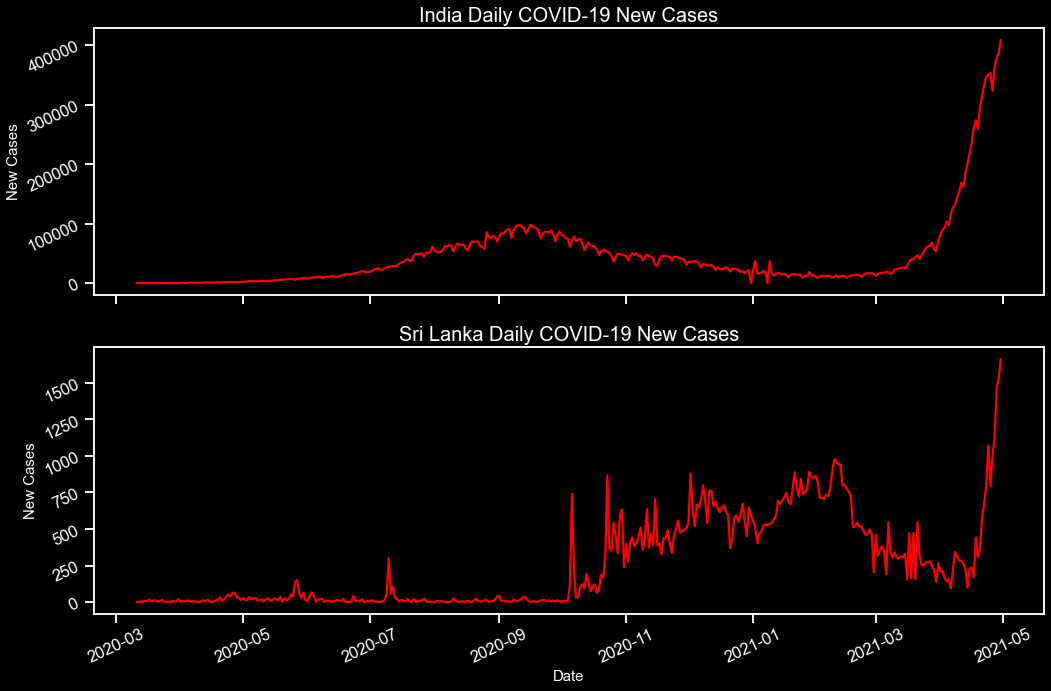

In [53]:
fig,ax =  plt.subplots(2,1, sharex=True,
                       figsize = ( 15, 10))
sns.lineplot(x = local['date'], y = local['y'],
             data = local,ax = ax[1], color='red')
ax[1].tick_params(labelrotation = 25)
ax[0].set_title('India Daily COVID-19 New Cases', fontsize=20)
sns.lineplot(x = india['date'], y = india['y'], data = india,ax = ax[0], color='red')
ax[0].tick_params(labelrotation = 25)
ax[1].set_title('Sri Lanka Daily COVID-19 New Cases', fontsize=20)
ax[0].set_ylabel('New Cases', fontsize=15)
ax[1].set_ylabel('New Cases', fontsize=15)
ax[1].set_xlabel('Date', fontsize=15)
fig.tight_layout(pad = 1.2)
plt.savefig('ind_lk_COVID_April30.png')